# Importing all the required libraries

In [57]:
import glob, re, os, collections
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from sklearn.decomposition import PCA

# make sure that graphs are embedded into our notebook output
%matplotlib inline

# Saving all the text from inside the directory

In [26]:
directory = "./CD"

# this dictionary will track our frequencies
docs = {}

# go through each txt file in the directory 
for file in glob.glob(directory + "/*.txt"):
    
    # read file as Latin 1 (remove encoding for UTF-8)
    with open(file, encoding="ISO-8859-1") as f:
        text = f.read();
        
        # tokenize
        tokens = re.findall(r'\b\w[\w-]*\b', text.lower())
        count = len(tokens)
        
        # convert to relative freqs
        relativefreqs = {}
        localfreqs = collections.Counter(tokens) # creates a data structure of words and counts
        
        for word, wordcount in localfreqs.items():
            
            # gather only words with alphabetical characters, discard numbers
            if word.isalpha():
                relativefreqs[word] = wordcount/count
            
        # add this document's relative freqs to our dictionary of all docs
        docs[os.path.basename(file)] = relativefreqs

# Convert frequency to dataframe
df = pd.DataFrame(docs)

# Replace all Nan with 0
df.fillna(0, inplace=True)

# Transpose the data so books are on the y axis
df = df.transpose()

# Writing to csv
df.to_csv("Frequency.csv", na_rep=0) 


# Loading the csv and its manipluation

In [45]:
# Read the csv
df = pd.read_csv('Frequency.csv') 

# Insert a name for the 1st column
df.rename(columns={'Unnamed: 0': 'Text'}, inplace=True) 
df.head(10)

,Text,a,aback,abandon,abandoned,abandoning,abandonment,abase,abased,abashed,...,youths,youthâ,youâ,z,zeal,zealous,zenith,zest,zip,â
0,Christmas Carol 1843.txt,0.023723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000031,0.000000,0.000000,0.000000,0.000031,0.000000
1,Great Expectations 1861.txt,0.020563,0.000005,0.000000,0.000010,0.000000,0.000000,0.000000,0.000005,0.000005,...,0.000000,0.000005,0.000630,0.000005,0.000010,0.000010,0.000000,0.000005,0.000005,0.040456
2,Oliver Twist 1839.txt,0.023150,0.000000,0.000006,0.000006,0.000000,0.000000,0.000006,0.000000,0.000000,...,0.000006,0.000000,0.000000,0.000006,0.000000,0.000012,0.000006,0.000000,0.000006,0.000000
3,Tales of Two Cities 1859.txt,0.020459,0.000007,0.000007,0.000069,0.000007,0.000007,0.000000,0.000000,0.000007,...,0.000007,0.000000,0.000185,0.000000,0.000000,0.000014,0.000000,0.000000,0.000007,0.039827


In [55]:
words = ["violence", "death" ,"blood", "fight", "attack", "kill"]

df2 = df.ix[1:,words]

type(df2)

# Get top 3 principle component
pca = PCA(n_components= 2)

pca.fit(df2) 

X = pca.transform(df2)

print(pca.explained_variance_ratio_)


[ 0.85985988  0.14014012]


# Graphing the PCA

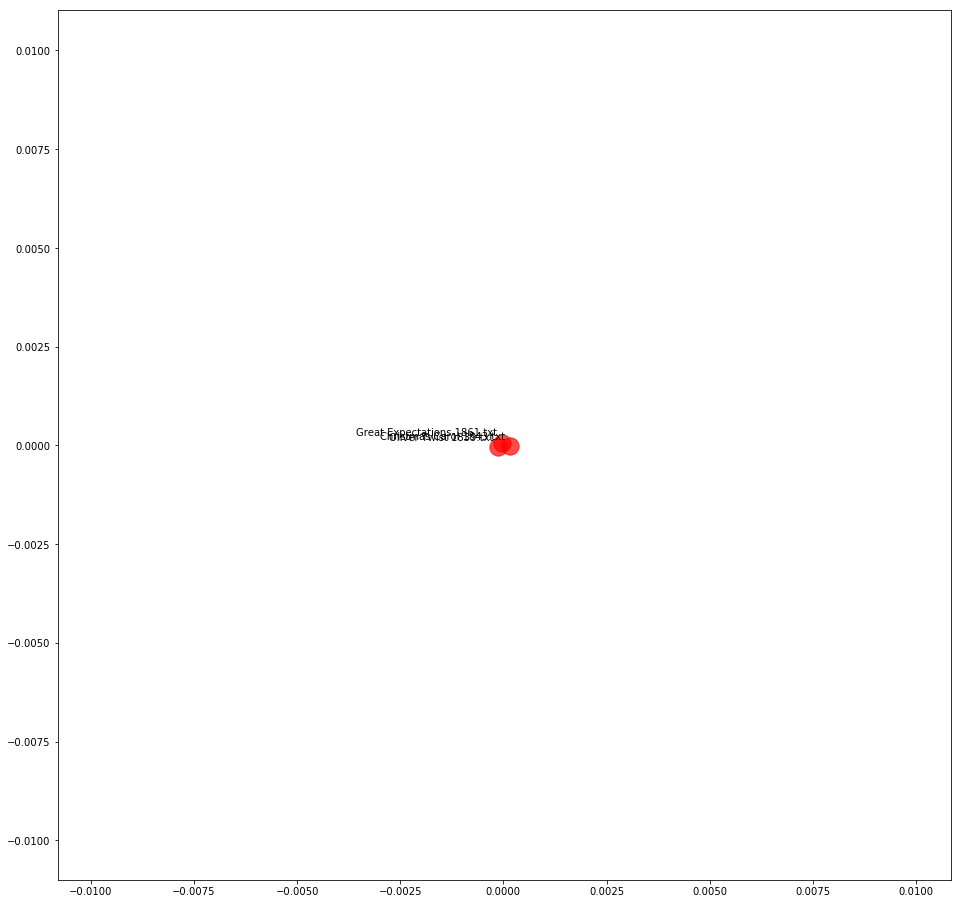

In [56]:
# Set the label
xAxisComp = 0
yAxisComp = 1
labels = df['Text'].tolist()

# Apply scatter plot
plt.figure(figsize=(16, 16))
plt.scatter(X[:,xAxisComp],X[:,yAxisComp],marker='o',
            color='r',
            alpha=0.7,
            s = 300,
            )

# Label the nodes in the graph
for label, x, y in zip(labels, X[:,xAxisComp],X[:,yAxisComp]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-5, 5),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        )

plt.show()